In [1]:
%load_ext autoreload
%autoreload 
import sys
from pathlib import Path
import pandas as pd

ProjectRoot = Path().cwd().parent.parent
sys.path.append(str(ProjectRoot))

In [2]:
from src.data.modelData import ObjectDetection, create_protein_seq_image
all_models_dir = Path('/home/satish27may/ProteinDomainDetection/models')
if not all_models_dir.exists():
    all_models_dir.mkdir(exist_ok=True, parents=True)
model_dir = Path('/home/satish27may/ProteinDomainDetection/models/seq_len_0-300_and_num_samples_0-1000_model')
model_dir.mkdir(exist_ok=True, parents=True)
    
all_classes = ['Lysozyme-PF03245',
    'Lysozyme-PF16754',
    'Lysozyme-PF11860',
    'Lysozyme-PF13702',
    'Lysozyme-PF00959',
    'Lysozyme-PF00182',
    'Lysozyme-PF00704',
    'Lysozyme-PF01374',
    'Lysozyme-PF05838',
    'Lysozyme-PF18013',
    'Lysozyme-PF04965',
    'Lysozyme-PF01183',
    'Lysozyme-PF00722',
    'peptidase-PF05193',
    'peptidase-PF01551',
    'peptidase-PF00675',
    'peptidase-PF01435',
    'peptidase-PF01433',
    'peptidase-PF10502',
    'peptidase-PF00246',
    'peptidase-PF03572',
    'peptidase-PF00814',
    'peptidase-PF17900',
    'Amidase_2-PF01510',
    'Amidase_3-PF01520',
    'CHAP-PF05257',
    'SH3_4-PF06347',
    'SH3_3-PF08239',
    'SH3_5-PF08460',
    'LysM-PF01476']
data_handler = ObjectDetection(class_names=all_classes, img_dim=224)
protein_domain_data = data_handler.create_protein_domain_df()
seq_len_bucket = (0, 300)
num_sample_bucket = (0,1000)
img_h, img_w = 224, seq_len_bucket[1]
bucket_df = data_handler.get_bucketised_data(protein_domain_data, seq_len_bucket, num_sample_bucket)
class_freq_map = dict(bucket_df['Class'].value_counts())
classes = [cls for cls in list(bucket_df['Class'].unique()) if class_freq_map[cls]>50]
bucket_df = bucket_df[bucket_df['Class'].isin(classes)]
bucket_df.to_csv(ProjectRoot/f"data/PfamData/seq_len_{'-'.join([str(x) for x in seq_len_bucket])}_and_num_samples_{'-'.join([str(x) for x in num_sample_bucket])}_data.csv",index=False)
data_handler.create_bucket_image_data(bucket_df, seq_len_bucket, num_sample_bucket)

images_dir = Path(f'/home/satish27may/ProteinDomainDetection/data/PfamData/seq_len_{seq_len_bucket[0]}-{seq_len_bucket[1]}_and_num_samples_{num_sample_bucket[0]}-{num_sample_bucket[1]}_images')
model_data = pd.read_csv(f'/home/satish27may/ProteinDomainDetection/data/PfamData/seq_len_{seq_len_bucket[0]}-{seq_len_bucket[1]}_and_num_samples_{num_sample_bucket[0]}-{num_sample_bucket[1]}_data.csv')
print(f"Selected {model_data['Class'].nunique()} classes:\n{model_data['Class'].unique()}")
model_data.head()

Fetching data from FASTA files for Lysozyme-PF03245
Fetching data from FASTA files for Lysozyme-PF16754
Fetching data from FASTA files for Lysozyme-PF11860
Fetching data from FASTA files for Lysozyme-PF13702
Fetching data from FASTA files for Lysozyme-PF00959
Fetching data from FASTA files for Lysozyme-PF00182
Fetching data from FASTA files for Lysozyme-PF00704
Fetching data from FASTA files for Lysozyme-PF01374
Fetching data from FASTA files for Lysozyme-PF05838
Fetching data from FASTA files for Lysozyme-PF18013
Fetching data from FASTA files for Lysozyme-PF04965
Fetching data from FASTA files for Lysozyme-PF01183
Fetching data from FASTA files for Lysozyme-PF00722
Fetching data from FASTA files for peptidase-PF05193
Fetching data from FASTA files for peptidase-PF01551
Fetching data from FASTA files for peptidase-PF00675
Fetching data from FASTA files for peptidase-PF01435
Fetching data from FASTA files for peptidase-PF01433
Fetching data from FASTA files for peptidase-PF10502
Fetchi

,Class,SeqLen,Sequence,SuperClass,dom,dom_len,dom_pos,id,img_pth,name
0,PF03245,156,MRWRFLTFVTFLASMLGAILYYRIQYKGAEETLRQVELEVKSRLAE...,Lysozyme,QYKGAEETLRQVELEVKSRLAEIEQLSRQIQTIAVLDLQHTRELEH...,125,"[24, 148]",Q2NV02_SODGM,/home/satish27may/ProteinDomainDetection/data/...,Q2NV02_SODGM
1,PF03245,161,MNLLPVLLKKYWLQLSVTLLIAVLAWTTDHYRDNAIQYKSQRDTAS...,Lysozyme,NAIQYKSQRDTASHSLTLANETISDMEVRQRDVAALDARYTKELAD...,127,"[33, 159]",Q8HA85_9CAUD,/home/satish27may/ProteinDomainDetection/data/...,Q8HA85_9CAUD
2,PF03245,153,MKFYVICGMAMALGVAMYVGSYYRTEYTKQLGINSDQKTEIQQLTD...,Lysozyme,EYTKQLGINSDQKTEIQQLTDRINDQNTHIAMLHKLDAKHTQELAH...,124,"[25, 148]",W1IQT4_9GAMM,/home/satish27may/ProteinDomainDetection/data/...,W1IQT4_9GAMM
3,PF03245,148,MLDFLKRIAPWLAAIMLYMAGYSLGYDKAETHYKEVMHNEYVTKQI...,Lysozyme,LGYDKAETHYKEVMHNEYVTKQIATQRTQQAVAKVSKEYQDTLAGI...,123,"[23, 145]",B4YQH8_9CAUD,/home/satish27may/ProteinDomainDetection/data/...,B4YQH8_9CAUD
4,PF03245,155,MSRLTSIISALVICIIVCLSWAVNHYRDNAITYKVQRDTVTQKLAL...,Lysozyme,NAITYKVQRDTVTQKLALANATITDMQTRQRDVAELDARYTKELAD...,126,"[28, 153]",Q76H63_9CAUD,/home/satish27may/ProteinDomainDetection/data/...,Q76H63_9CAUD


# Enrich classes with less samples

In [8]:
# enrich PF13702, PF08460, PF18013, PF16754 classes data by taking random crop samples
# of same classes from segment where seq len is btw 300 and 600 using random crop of 
# sequences to length 300 with domain
import random, re
required_cls_sample_size = 350
classes2enrich = ['PF13702', 'PF08460', 'PF18013', 'PF16754']
_300_600_data = pd.read_csv(ProjectRoot/'data/PfamData/seq_len_300-600_and_num_samples_0-1000_data.csv')
_300_600_data['dom_pos'] = _300_600_data['dom_pos'].apply(lambda x: [int(y) for y in x.replace('[', "").replace("]","").split(",")])
new_bucket_class_freq = dict(_300_600_data[_300_600_data['Class'].isin(list(bucket_df['Class'].unique()))]['Class'].value_counts())
augs_save_dir = Path(bucket_df['img_pth'][0]).parent

enrich_rows = []
for cls_name in classes2enrich:
    new_cls_df = _300_600_data[_300_600_data['Class']==cls_name]
    old_cls_df = bucket_df[bucket_df['Class']==cls_name]
    num_augs = required_cls_sample_size - old_cls_df.shape[0]
    
    # sample sequences form new class_df
    print(f'Class: {cls_name}')
    print(f"   number of classes present: {len(old_cls_df)}-->{required_cls_sample_size}")
    print(f"   number of augs req: {num_augs}")
    new_cls_rows = [row for index, row in new_cls_df.iterrows()]
    aug_compl = 0

    while aug_compl < required_cls_sample_size:
        row_data = random.choice(new_cls_rows)
        sequence = row_data['Sequence']
        dom_start, dom_end = row_data['dom_pos']
        start_range = list(range(dom_start))
        end_range = list(range(dom_end+1, len(sequence)))
        if len(start_range) >2 and len(end_range) >2:
            cropped_seq = sequence[random.choice(start_range): random.choice(end_range)]
            if len(cropped_seq)<seq_len_bucket[1]:
                assert row_data['dom'] in cropped_seq, f"{ row_data['dom']}, {cropped_seq}"
                new_dom_pos = [(m.start(0), m.end(0)) for m in re.finditer(row_data['dom'], cropped_seq)][0]
                assert cropped_seq[new_dom_pos[0]:new_dom_pos[1]] == row_data['dom']
                img_name = augs_save_dir/f'{cls_name}_random_crop_{aug_compl}.png'
                enrich_rows.append({'Class':cls_name,
                             'SeqLen':len(cropped_seq),
                             'Sequence':cropped_seq,
                             'SuperClass':row_data['SuperClass'],
                             'dom':cropped_seq[new_dom_pos[0]:new_dom_pos[1]],
                             'dom_len':len(cropped_seq[new_dom_pos[0]:new_dom_pos[1]]),
                             'dom_pos':new_dom_pos,
                             'id':row_data['id'],
                             'img_pth':str(img_name),
                             'name':row_data['name']})
                #create image
                create_protein_seq_image((cropped_seq,img_name, img_h, seq_len_bucket[1]), data_handler.color_map)
                aug_compl+=1
            else:
                continue
        else:
            continue
        
enriched_data_df = pd.DataFrame(enrich_rows)

Class: PF13702
   number of classes present: 213-->350
   number of augs req: 137
/home/satish27may/ProteinDomainDetection/data/PfamData/seq_len_0-300_and_num_samples_0-1000_images/PF13702_random_crop_0.png
/home/satish27may/ProteinDomainDetection/data/PfamData/seq_len_0-300_and_num_samples_0-1000_images/PF13702_random_crop_1.png
/home/satish27may/ProteinDomainDetection/data/PfamData/seq_len_0-300_and_num_samples_0-1000_images/PF13702_random_crop_2.png
/home/satish27may/ProteinDomainDetection/data/PfamData/seq_len_0-300_and_num_samples_0-1000_images/PF13702_random_crop_3.png
/home/satish27may/ProteinDomainDetection/data/PfamData/seq_len_0-300_and_num_samples_0-1000_images/PF13702_random_crop_4.png
/home/satish27may/ProteinDomainDetection/data/PfamData/seq_len_0-300_and_num_samples_0-1000_images/PF13702_random_crop_5.png
/home/satish27may/ProteinDomainDetection/data/PfamData/seq_len_0-300_and_num_samples_0-1000_images/PF13702_random_crop_6.png
/home/satish27may/ProteinDomainDetection/da

In [4]:
import torch
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

import pandas as pd
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms
from tqdm import tqdm

/home/satish27may/anaconda3/envs/detectron2/lib/python3.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [5]:
from detectron2.structures import BoxMode

def create_train_valid_test_data(data_df):
    train_dfs,valid_dfs = [],[],
    for class_name in data_df['Class'].unique():
        class_df = data_df[data_df['Class']==class_name].sample(frac=1)
        num_samples = class_df.shape[0]
        num_train_samples = int(round(num_samples*0.7))
        train_dfs.append(class_df.iloc[:num_train_samples,:])
        valid_dfs.append(class_df.iloc[num_train_samples:,:])
    return pd.concat(train_dfs,axis='rows').sample(frac=1), pd.concat(valid_dfs,axis='rows').sample(frac=1)
    
def create_dataset(model_data, img_h, img_w, mode, classes, aug_data):
    model_data = model_data[model_data['Class'].isin([x.split('-')[-1] for x in classes])]
    print(f"Classes selected: {model_data['Class'].unique()}")
    print(f"SuperClasses selected: {model_data['SuperClass'].unique()}")
    model_data = model_data.reset_index(drop=True)
    model_data['dom_pos'] = model_data['dom_pos'].apply(lambda x: [int(y) for y in x.replace('[','').replace(']','').split(',')])
    C2I = {class_name:index for index, class_name in enumerate(model_data['Class'].unique())}
    train_dicts_list = []
    valid_dicts_list = []
    train, valid = create_train_valid_test_data(model_data)
    # add enriched data to train
    train = pd.concat([train, enriched_data_df],axis='rows')
    if aug_data:
        print(f"train data before aug: {train.shape[0]}\n{train['Class'].value_counts()}")
        train = data_handler.augment_data(train,(img_h,img_w), num_augs=300)
        print(f"Class dist in train after aug:\n {train['Class'].value_counts()}")
        print(f'train data after aug: {train.shape[0]}')
    train = train.reset_index(drop=True)
    valid = valid.reset_index(drop=True)
    for index in tqdm(range(train.shape[0])):
        x1,x2 = train['dom_pos'][index]
        train_dicts_list.append({'file_name':train['img_pth'][index],
                           'height':img_h,
                           'width': img_w,
                           'image_id': index,
                           'annotations':[{'bbox':[x1, 0, x2, img_h],
                                           'bbox_mode':BoxMode.XYXY_ABS,
                                           'category_id':  C2I[train['Class'][index]],
                                          }]
                          })
    for index in tqdm(range(valid.shape[0])):
        x1,x2 = valid['dom_pos'][index]
        valid_dicts_list.append({'file_name':valid['img_pth'][index],
                           'height':img_h,
                           'width': img_w,
                           'image_id': index,
                           'annotations':[{'bbox':[x1, 0, x2, img_h],
                                           'bbox_mode':BoxMode.XYXY_ABS,
                                           'category_id':  C2I[valid['Class'][index]],
                                          }]
                          })
    if mode=='train':return train_dicts_list
    elif mode=='valid': return valid_dicts_list

train_list = create_dataset(model_data, img_h=224, img_w=seq_len_bucket[1], mode='train', classes=classes, aug_data=True)
valid_list = create_dataset(model_data, img_h=224, img_w=seq_len_bucket[1], mode='valid', classes=classes, aug_data=False)
def get_train_data():
    return train_list

def get_valid_data():
    return valid_list

Classes selected: ['PF03245' 'PF16754' 'PF11860' 'PF13702' 'PF08460' 'PF01374' 'PF18013']
SuperClasses selected: ['Lysozyme' 'SH3_5']
train data before aug: 2548
PF13702    499
PF08460    444
PF18013    440
PF16754    390
PF03245    278
PF01374    256
PF11860    241
Name: Class, dtype: int64
PF01374 has 256 samples, adding 44 augs..
img_arrsshape: (2, 224, 300, 3) 
img_pth:/home/satish27may/ProteinDomainDetection/data/PfamData/images_224/img_A0A1H6E1N4_9ACTN_PF01374_Lysozyme.png
img shape:(224, 1000, 3)


ValueError: could not broadcast input array from shape (224,1000,3) into shape (224,300,3)

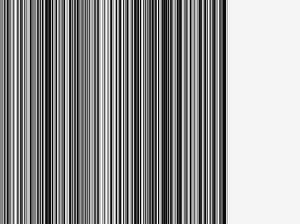

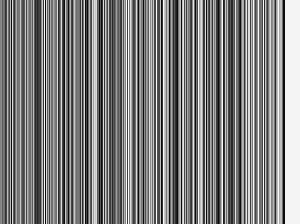

In [5]:
import random
from IPython.display import Image, display
for i in range(2):
    img = random.choice(list(images_dir.glob('*.png')))
    display(Image(filename=str(img)))
    

In [6]:
DatasetCatalog.register("train", get_train_data)
DatasetCatalog.register("valid", get_valid_data)

In [7]:
from detectron2.data import MetadataCatalog
MetadataCatalog.get("train").thing_classes = classes
MetadataCatalog.get("valid").thing_classes = classes

In [8]:
import os
# ! trash-put /home/satish27may/ProteinDomainDetection/models/seq_len_0-300_and_num_samples_0-1000_model
model_dir

PosixPath('/home/satish27may/ProteinDomainDetection/models/seq_len_0-300_and_num_samples_0-1000_model')

In [9]:
bucket_df['Class'].value_counts()

PF03245    397
PF01374    366
PF11860    344
PF13702    213
PF08460    134
PF18013    129
PF16754     57
Name: Class, dtype: int64

In [10]:
from detectron2.engine import DefaultTrainer
from detectron2.config import CfgNode as CN
img_h, img_w = 224, 1000
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/retinanet_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("train",)
cfg.DATASETS.TEST = ("valid",)
#cfg.MODEL.PIXEL_MEAN = data_mean
#cfg.MODEL.PIXEL_STD = data_std
cfg.INPUT.RANDOM_FLIP = "vertical"
cfg.TEST.DETECTIONS_PER_IMAGE = 100

cfg.INPUT.MIN_SIZE_TRAIN = (224,)
cfg.INPUT.MIN_SIZE_TRAIN_SAMPLING = "choice"
# Maximum size of the side of the image during training
cfg.INPUT.MAX_SIZE_TRAIN = seq_len_bucket[1]
# Size of the smallest side of the image during testing. Set to zero to disable resize in testing.
cfg.INPUT.MIN_SIZE_TEST = 224
# Maximum size of the side of the image during testing
cfg.INPUT.MAX_SIZE_TEST = seq_len_bucket[1]


cfg.TEST.AUG.FLIP = False
cfg.DATALOADER.NUM_WORKERS = 8
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/retinanet_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 1e-3  # pick a good LR
cfg.SOLVER.LR_SCHEDULER_NAME = "WarmupCosineLR"
#cfg.MODEL.RETINANET.IOU_THRESHOLDS = [0.4, 0.5]
cfg.SOLVER.MAX_ITER = 15000
cfg.MODEL.RETINANET.NUM_CLASSES = len(classes)
# cfg.MODEL.ROI_HEADS.NUM_CLASSES = len(data_handler.class_names)

cfg.OUTPUT_DIR =str(model_dir)
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

Loading config /home/satish27may/anaconda3/envs/detectron2/lib/python3.7/site-packages/detectron2/model_zoo/configs/COCO-Detection/../Base-RetinaNet.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


[11/27 17:17:22 d2.engine.defaults]: Model:
RetinaNet(
  (backbone): FPN(
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelP6P7(
      (p6): Conv2d(2048, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (p7): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    )
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res2)

Skip loading parameter 'head.cls_score.weight' to the model due to incompatible shapes: (720, 256, 3, 3) in the checkpoint but (63, 256, 3, 3) in the model! You might want to double check if this is expected.
Skip loading parameter 'head.cls_score.bias' to the model due to incompatible shapes: (720,) in the checkpoint but (63,) in the model! You might want to double check if this is expected.


[11/27 17:17:24 d2.engine.train_loop]: Starting training from iteration 0


/home/satish27may/anaconda3/envs/detectron2/lib/python3.7/site-packages/fvcore/transforms/transform.py:433: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  tensor = torch.from_numpy(np.ascontiguousarray(img))
/home/satish27may/anaconda3/envs/detectron2/lib/python3.7/site-packages/fvcore/transforms/transform.py:433: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writea

[11/27 17:17:32 d2.utils.events]:  eta: 1:26:30  iter: 19  total_loss: 1.133  loss_cls: 0.8813  loss_box_reg: 0.2714  time: 0.3742  data_time: 0.0312  lr: 1.9981e-05  max_mem: 2648M
[11/27 17:17:39 d2.utils.events]:  eta: 1:25:46  iter: 39  total_loss: 1.437  loss_cls: 1.127  loss_box_reg: 0.2818  time: 0.3586  data_time: 0.0044  lr: 3.996e-05  max_mem: 2648M
[11/27 17:17:46 d2.utils.events]:  eta: 1:25:39  iter: 59  total_loss: 1.366  loss_cls: 1.107  loss_box_reg: 0.2072  time: 0.3541  data_time: 0.0045  lr: 5.9939e-05  max_mem: 2648M
[11/27 17:17:53 d2.utils.events]:  eta: 1:25:36  iter: 79  total_loss: 1.185  loss_cls: 0.9777  loss_box_reg: 0.1785  time: 0.3516  data_time: 0.0045  lr: 7.9916e-05  max_mem: 2648M
[11/27 17:18:00 d2.utils.events]:  eta: 1:25:25  iter: 99  total_loss: 0.9512  loss_cls: 0.7206  loss_box_reg: 0.2359  time: 0.3498  data_time: 0.0046  lr: 9.989e-05  max_mem: 2648M
[11/27 17:18:07 d2.utils.events]:  eta: 1:25:17  iter: 119  total_loss: 0.7013  loss_cls: 0.5

In [11]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

evaluator = COCOEvaluator("valid", ("bbox",), False, output_dir=cfg.OUTPUT_DIR )
val_loader = build_detection_test_loader(cfg, "valid")
print(trainer.test(cfg, trainer.model, evaluator))

[11/27 18:43:46 d2.evaluation.coco_evaluation]: 'valid' is not registered by `register_coco_instances`. Therefore trying to convert it to COCO format ...
[11/27 18:43:46 d2.data.datasets.coco]: Converting annotations of dataset 'valid' to COCO format ...)
[11/27 18:43:46 d2.data.datasets.coco]: Converting dataset dicts into COCO format
[11/27 18:43:46 d2.data.datasets.coco]: Conversion finished, #images: 492, #annotations: 492
[11/27 18:43:46 d2.data.datasets.coco]: Caching COCO format annotations at '/home/satish27may/ProteinDomainDetection/models/seq_len_0-300_and_num_samples_0-1000_model/valid_coco_format.json' ...
[11/27 18:43:46 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(224, 224), max_size=300, sample_style='choice')]
[11/27 18:43:46 d2.data.common]: Serializing 492 elements to byte tensors and concatenating them all ...
[11/27 18:43:46 d2.data.common]: Serialized dataset takes 0.14 MiB
[11/27 18:43:46 d2.data.

In [ ]:
|:----------:|:-------------|:----------:|:-------------|:----------:|:-------------|
|  PF03245   | 119          |  PF16754   | 17           |  PF11860   | 103          |
|  PF13702   | 64           |  PF08460   | 40           |  PF01374   | 110          |
|  PF18013   | 39           |            |              |            |              |
|   total    | 492          |            |              |            |              |

In [12]:
predictor = DefaultPredictor(cfg)
outputs = predictor(im)
v = Visualizer(im[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

Skip loading parameter 'head.cls_score.weight' to the model due to incompatible shapes: (720, 256, 3, 3) in the checkpoint but (63, 256, 3, 3) in the model! You might want to double check if this is expected.
Skip loading parameter 'head.cls_score.bias' to the model due to incompatible shapes: (720,) in the checkpoint but (63,) in the model! You might want to double check if this is expected.


NameError: name 'im' is not defined

In [ ]:
| category   | AP     | category   | AP     | category   | AP     |
|:-----------|:-------|:-----------|:-------|:-----------|:-------|
| PF03245    | 92.399 | PF16754    | 7.305  | PF11860    | 86.146 |
| PF13702    | 85.207 | PF08460    | 71.322 | PF01374    | 85.150 |
| PF18013    | 48.634 |            |        |            |        |